In [30]:
import pandas as pd
# Step 1: Load the both datasets

# Load a sample of the title.akas.tsv file
akas_df = pd.read_csv('https://datasets.imdbws.com/title.akas.tsv.gz', delimiter='\t', encoding='utf-8', nrows=1000)

# Load a sample of the title.ratings.tsv file
ratings_df = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', delimiter='\t', encoding='utf-8', nrows=1000)


In [32]:
# Step 2: display the title.akas.tsv file

# Display the first few rows of the 'title.akas.tsv' dataframe
akas_df.head()


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [34]:
# Step 3: display the title.akas.tsv file
# Display the first few rows of the 'title.ratings.tsv' dataframe
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1982
1,tt0000002,5.8,265
2,tt0000003,6.5,1836
3,tt0000004,5.6,179
4,tt0000005,6.2,2625


In [7]:
# Step 4: Merge the dataframes based on the 'titleId' and 'tconst' columns
merged_df = pd.merge(akas_df, ratings_df, left_on='titleId', right_on='tconst')

# Display the first few rows of the merged dataframe
merged_df.head()


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,averageRating,numVotes
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0,tt0000001,5.7,1982
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0,tt0000001,5.7,1982
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,tt0000001,5.7,1982
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0,tt0000001,5.7,1982
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0,tt0000001,5.7,1982


In [9]:
# Step 5: Filter the merged dataframe to include only rows where 'type' is equal to 'original'
original_filtered_df = merged_df[merged_df['types'] == 'original']

# Display the first few rows of the 'original' filtered dataframe
original_filtered_df.head()


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,averageRating,numVotes
6,tt0000001,7,Carmencita,\N,\N,original,\N,1,tt0000001,5.7,1982
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,tt0000002,5.8,265
21,tt0000003,6,Pauvre Pierrot,\N,\N,original,\N,1,tt0000003,6.5,1836
25,tt0000004,1,Un bon bock,\N,\N,original,\N,1,tt0000004,5.6,179
34,tt0000005,11,Blacksmith Scene,\N,\N,original,\N,1,tt0000005,6.2,2625


In [11]:
# Step 6: Select the desired columns: titleId, averageRating, numVotes, title
selected_columns_df = original_filtered_df[['titleId', 'averageRating', 'numVotes', 'title']].copy()

# Rename the 'titleId' column to 'title_id' for consistency
selected_columns_df.rename(columns={'titleId': 'title_id'}, inplace=True)

# Display the first few rows of the dataframe with selected columns
selected_columns_df.head()




,title_id,averageRating,numVotes,title
6,tt0000001,5.7,1982,Carmencita
8,tt0000002,5.8,265,Le clown et ses chiens
21,tt0000003,6.5,1836,Pauvre Pierrot
25,tt0000004,5.6,179,Un bon bock
34,tt0000005,6.2,2625,Blacksmith Scene


In [25]:


# Step 7: Calculate mean and variance
mean_rating = selected_columns_df.loc[selected_columns_df['numVotes'] >= 1000, 'averageRating'].mean()
variance_rating = selected_columns_df.loc[selected_columns_df['numVotes'] >= 1000, 'averageRating'].var()

# Create a dataframe for mean and variance
statistics_df = pd.DataFrame({'Parameter': ['Mean Rating', 'Variance'],
                              'Value': [mean_rating, variance_rating]})

# Display the statistics dataframe
statistics_df




,Parameter,Value
0,Mean Rating,6.498523
1,Variance,1.618746


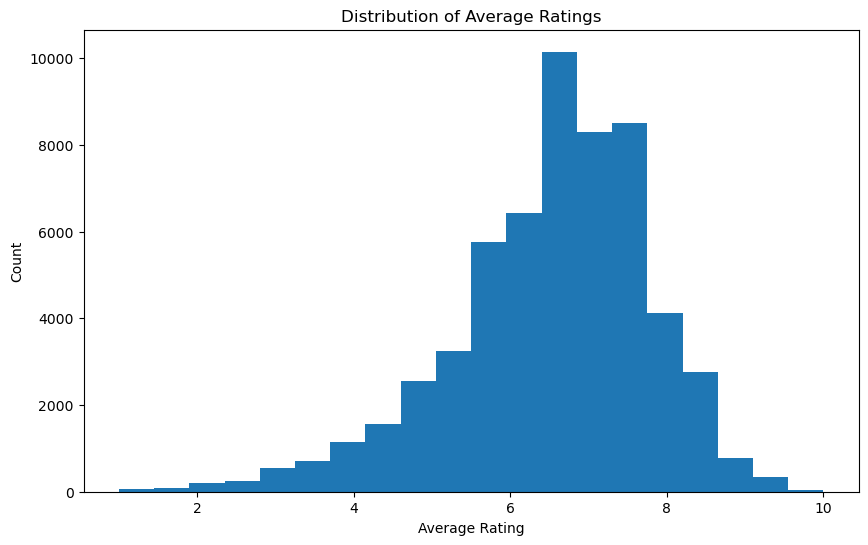

In [26]:
import matplotlib.pyplot as plt
# Step 8: Visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(selected_columns_df.loc[selected_columns_df['numVotes'] >= 1000, 'averageRating'], bins=20)
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Distribution of Average Ratings')
plt.show()


In [27]:
# Step 9: Display the top 20 entries based on rating 
top_20_entries = selected_columns_df.loc[selected_columns_df['numVotes'] >= 1000].nlargest(20, 'averageRating')

# Display the top 20 entries
top_20_entries


,title_id,averageRating,numVotes,title,distance_to_mean
3000571,tt19514578,10.0,1321,Shubh Yatra,3.501477
3198688,tt2301451,10.0,197771,Ozymandias,3.501477
3309195,tt26280696,9.9,1224,Saachi,3.401477
3333515,tt27033333,9.9,1206,Richiegadipelli,3.401477
3624240,tt4283088,9.9,216867,Battle of the Bastards,3.401477
3624244,tt4283094,9.9,154077,The Winds of Winter,3.401477
1975365,tt10116578,9.8,1808,Call Me Kevin,3.301477
2287339,tt1216108,9.8,10426,House's Head,3.301477
2593886,tt1444421,9.8,14311,The Getaway,3.301477
2937657,tt1833197,9.8,16584,"Goodbye, Michael",3.301477
